In [18]:
!pip install pyellipsoid

In [19]:
import os
import time
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
# Utilities for working with remote data
import requests
from io import BytesIO
import zipfile
# Image processing shortcuts
import imageio
import cv2
import copy
from imageio import get_writer
import tensorflow as tf
from IPython import display
from PIL import Image
from google.colab import files
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import save_img

In [20]:
#defining a function that make a mask of an elipsoid 
from pyellipsoid.geometry import build_rotation_matrix
def make_ellipsoid_image(shape, center, radii, angle):
    """Draw a 3D binary image containing a 3D ellipsoid.
    Arguments:
        shape {list} -- image shape [z, y, x]
        center {list} -- center of the ellipsoid [x, y, z]
        radii {list} -- radii [x, y, z]
        angle {list} -- rotation angles [x, y, z]
    Raises:
        ValueError -- arguments are wrong
    Returns:
        [numpy.array] -- image with ellipsoid
    """
    if len(shape) != 3:
        raise ValueError('Only 3D ellipsoids are supported.')

    if not (len(center) == len(radii) == len(shape)):
        raise ValueError('Center, radii of ellipsoid and image shape have different dimensionality.')

    # Do opposite rotation since it is an axes rotation.
    angle = -1 * np.array(angle)
    R = build_rotation_matrix(*angle)

    # Convert to numpy
    radii = np.array(radii)

    # Build a grid and get its points as a list
    xi = tuple(np.linspace(0, s-1, s) - np.floor(0.5 * s) for s in shape)

    # Build a list of points forming the grid
    xi = np.meshgrid(*xi, indexing='ij')
    points = np.array(xi).reshape(3, -1)[::-1]

    # Reorder coordinates to match XYZ order and rotate
    points = np.dot(R, points).T

    # Find grid center and rotate
    grid_center = np.array(center) - 0.5*np.array(shape[::-1])
    grid_center = np.dot(R, grid_center)

    # Reorder coordinates back to ZYX to match the order of numpy array axis
    points = points[:, ::-1]
    grid_center = grid_center[::-1]
    radii = radii[::-1]

    # Draw the ellipsoid
    # dx**2 + dy**2 + dz**2 = r**2
    # dx**2 / r**2 + dy**2 / r**2 + dz**2 / r**2 = 1
    dR = (points - grid_center)**2
    dR = dR / radii**2
    # Sum dx, dy, dz / r**2
    nR = np.sum(dR, axis=1).reshape(shape)

    ell = (nR <= 1).astype(np.uint8)

    return ell

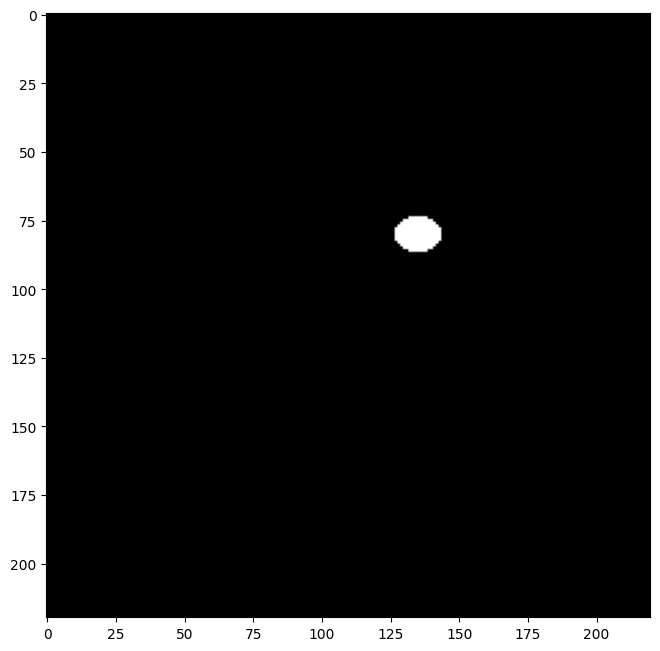

In [21]:
#simulating some dental capsule for the different volumes, setting the volume size and the position, axes and angle of the ellipsoid
# 1 capsula un dente dietro
H, W, D = 208,220,220
ell_axes=(8.4,6.8,7)
ell_angle=(0,0,0)
ell_center=(135,80,27)
overlay =make_ellipsoid_image((H, W, D), ell_center, ell_axes, ell_angle)
cv2.normalize(overlay, overlay, 0, 255, cv2.NORM_MINMAX)
a=ell_center[1]
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(overlay[27,:,:], cmap=plt.cm.gray)


In [ ]:
# 2 ponte tre denti
H, W, D = 208,220,220
ell_axes=(5.4,10,7)
ell_angle=(0,0,0)
ell_center=(135,76,27)   
overlay =make_ellipsoid_image((H, W, D), ell_center, ell_axes, ell_angle)
cv2.normalize(overlay, overlay, 0, 255, cv2.NORM_MINMAX)
a=ell_center[1]
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(overlay[:,:,85], cmap=plt.cm.gray)



In [ ]:
#3 due piccoli impiantini
H, W, D = 172,172,172
ell_axes1=(4.6,4.5,5)
ell_axes2=(5.6,2.5,6)
ell_angle=(0,0,-np.pi/8)

ell_center1=(125,80,77)
ell_center2=(105,30,60)
overlay1 =make_ellipsoid_image((H, W, D), ell_center1, ell_axes1, ell_angle)
overlay2 =make_ellipsoid_image((H, W, D), ell_center2, ell_axes2, ell_angle)
cv2.normalize(overlay1, overlay1, 0, 255, cv2.NORM_MINMAX)
cv2.normalize(overlay2, overlay2, 0, 255, cv2.NORM_MINMAX)
overlay=overlay1+overlay2
#a=ell_center[1]
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(overlay[90,:,:], cmap=plt.cm.gray)


In [ ]:
#4 impianto axiom 4mmx12mm
H, W, D = 172,172,172
ell_axes=(6.6,6.6,20)
ell_angle=(0,0,0)
ell_center=(123,68,64)
#ell_center=(133,71,38)
overlay =make_ellipsoid_image((H, W, D), ell_center, ell_axes, ell_angle)
cv2.normalize(overlay, overlay, 0, 255, cv2.NORM_MINMAX)
a=ell_center[1]
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(overlay[68,:,:], cmap=plt.cm.gray)


In [ ]:
#5 impianto dentaltech 5mmx8mm
H, W, D = 172,172,172
ell_axes=(8.3,8.3,13.3)
ell_angle=(0,0,0)
ell_center=(47,63,76)
overlay =make_ellipsoid_image((H, W, D), ell_center, ell_axes, ell_angle)
cv2.normalize(overlay, overlay, 0, 255, cv2.NORM_MINMAX)
a=ell_center[1]
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(overlay[:,a,:], cmap=plt.cm.gray)

In [ ]:
#6 dente davanti per vol 2
H, W, D = 172,172,172
ell_axes1=(5.4,5.6,6)

ell_angle=(0,0,0)

ell_center=(47,63,76)
overlay =make_ellipsoid_image((H, W, D), ell_center, ell_axes, ell_angle)
cv2.normalize(overlay, overlay, 0, 255, cv2.NORM_MINMAX)
a=ell_center[1]
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(overlay[34,:,:], cmap=plt.cm.gray)

In [ ]:
#7 biotech imoianto 3x12mm
H, W, D = 208,220,220
ell_axes=(6,6,20)
ell_angle=(0,0,0)
ell_center=(63,77,37)
overlay =make_ellipsoid_image((H, W, D), ell_center, ell_axes, ell_angle)
cv2.normalize(overlay, overlay, 0, 255, cv2.NORM_MINMAX)
a=ell_center[1]
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(overlay[27,:,:], cmap=plt.cm.gray)

In [ ]:
#8 impiantino piccolo e dente coperto 
H, W, D = 172,172,172
ell_axes1=(4,2,4.5)
ell_angle=(0,0,0)
ell_center1=(118,38,75)
ell_axes2=(3,3,5.5)
ell_angle=(0,0,0)
ell_center2=(118,38,101)
overlay1 =make_ellipsoid_image((H, W, D), ell_center1, ell_axes1, ell_angle)
overlay2 =make_ellipsoid_image((H, W, D), ell_center2, ell_axes2, ell_angle)
cv2.normalize(overlay1, overlay1, 0, 255, cv2.NORM_MINMAX)
cv2.normalize(overlay2, overlay2, 0, 255, cv2.NORM_MINMAX)
overlay=overlay1+overlay2
a=ell_center[1]
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(overlay[27,:,:], cmap=plt.cm.gray)


In [ ]:
#download and reorder volume 
ctr = requests.get(
    'http://144.91.118.156/vol_1.zip')
ctzip = BytesIO(ctr.content)
ct_fdata = zipfile.ZipFile(ctzip)
vol = np.array(
    [imageio.imread(ct_fdata.open(fname)) for fname in ct_fdata.namelist()])
vol = cv2.normalize(vol, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)


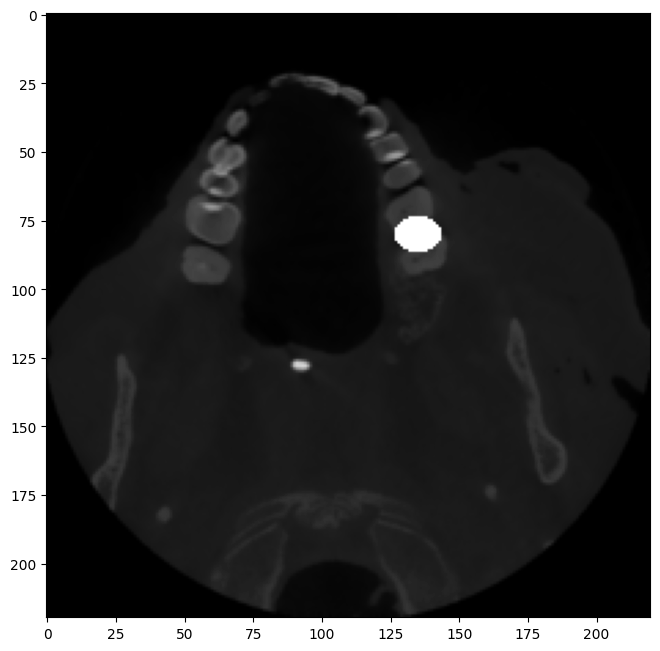

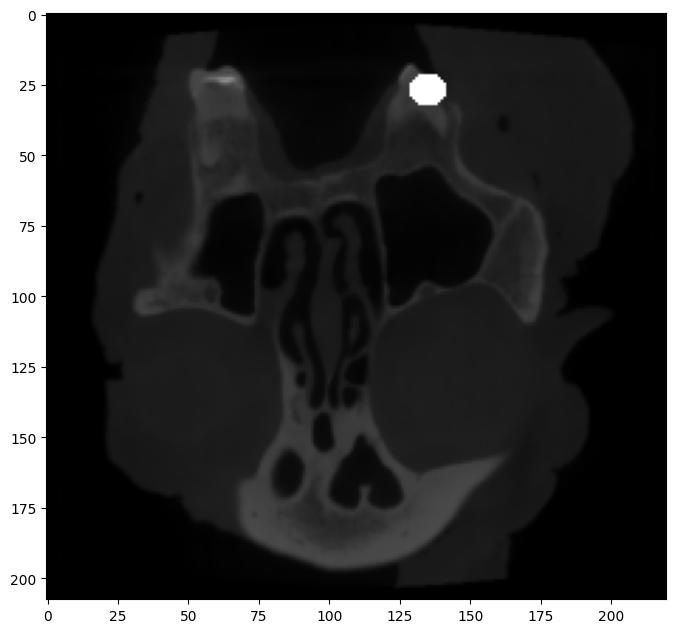

<Figure size 800x800 with 0 Axes>

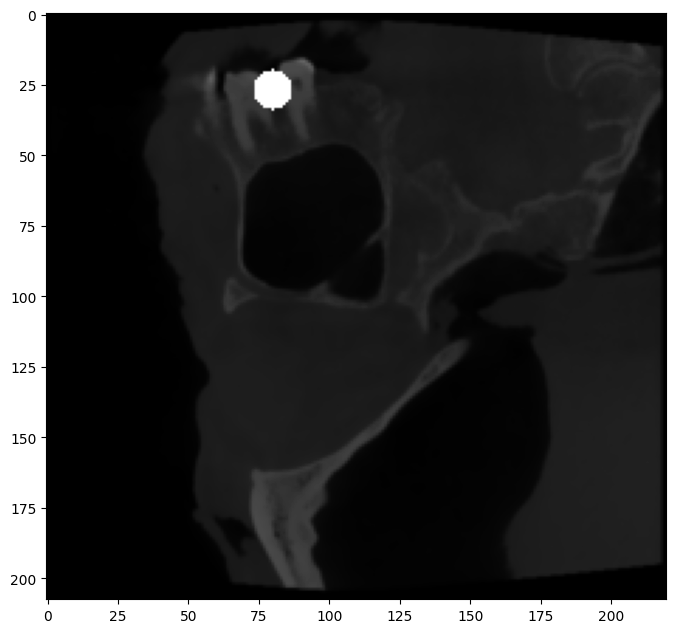

In [ ]:
#creating the masked volume to check the capsule position before downloading the mask volume
mask_vol=vol
mask_vol[overlay >= mask_vol] = overlay[overlay >= mask_vol]
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(mask_vol[27,:,:], cmap=plt.cm.gray)
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(mask_vol[:,76,:], cmap=plt.cm.gray)
plt.figure(figsize=(8, 8), dpi=100)
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(mask_vol[:,:,135], cmap=plt.cm.gray)

In [ ]:
#removing previus image if the code have been running before
#for i in range(208):
 # j=i+100
 # %rm 'impianto_{j}.png'

In [22]:
#downloading the mask volume
projections=overlay
cv2.normalize(projections, projections, 0, 255, cv2.NORM_MINMAX)
projections = projections.astype(np.uint8)
n=projections.shape[0]
for i in range(n):
  projection = projections[i, :,:]
  img = Image.fromarray(projection,'L')
  j=i+100
  img.save(f'impianto_{j}.png' )
!zip -r imp.zip . -i 'impianto_*.png'
files.download( 'imp.zip' )


updating: impianto_252.png (deflated 39%)
updating: impianto_114.png (deflated 39%)
updating: impianto_245.png (deflated 39%)
updating: impianto_125.png (deflated 18%)
updating: impianto_265.png (deflated 39%)
updating: impianto_243.png (deflated 39%)
updating: impianto_229.png (deflated 39%)
updating: impianto_237.png (deflated 39%)
updating: impianto_191.png (deflated 39%)
updating: impianto_155.png (deflated 39%)
updating: impianto_103.png (deflated 39%)
updating: impianto_231.png (deflated 39%)
updating: impianto_113.png (deflated 39%)
updating: impianto_206.png (deflated 39%)
updating: impianto_226.png (deflated 39%)
updating: impianto_157.png (deflated 39%)
updating: impianto_193.png (deflated 39%)
updating: impianto_290.png (deflated 39%)
updating: impianto_188.png (deflated 39%)
updating: impianto_152.png (deflated 39%)
updating: impianto_295.png (deflated 39%)
updating: impianto_277.png (deflated 39%)
updating: impianto_102.png (deflated 39%)
updating: impianto_205.png (deflat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>